# Exploring Hypotheses

In [1]:
import ast

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from info_gain import info_gain

### Hypothesis 1: “Movement of the Fed fun is more dependent on the speaker than the nature of the event.”

#### Preparing Dataset

In [2]:
df = pd.read_csv('https://www.dropbox.com/s/l0y4g1t96ry4eyn/raw_data.txt?dl=1')

In [3]:
df = df.dropna(subset=['text'])

In [4]:
df.head()

,date,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,DFF,minutes,minutes_speaker,speeches,speeches_speaker,statements,statements_speaker,testimony,testimony_speaker,pressconf,pressconf_speaker,text
0,2006-01-31,15267.026000,199.3,4.7,135429.0,179293.0,8.371156e+06,12.95,4.47,A meeting of the Federal Open Market Committe...,Alan Greenspan,I thank you for the invitation to speak today...,"['Governor Susan Schmidt Bies', 'Chairman Ben ...",The Federal Open Market Committee decided tod...,Alan Greenspan,Chairman Bernanke presented identical testimo...,['Chairman Ben S. Bernanke'],CHAIRMAN GREENSPAN. Thank you all very much....,Alan Greenspan,A meeting of the Federal Open Market Committe...
1,2006-02-28,15278.919000,199.4,4.8,135737.0,177887.0,8.387451e+06,12.34,4.52,A meeting of the Federal Open Market Committe...,Ben Bernanke,I appreciate the opportunity to speak to you ...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Chai...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...",['Governor Donald L. Kohn'],"CHAIRMAN BERNANKE. Welcome, everyone. It ha...",Ben Bernanke,A meeting of the Federal Open Market Committe...
2,2006-03-31,15290.812000,199.7,4.7,136047.0,178100.0,8.403747e+06,11.39,5.00,NaN,NaN,I am pleased to participate in the panel disc...,"['Vice Chairman Roger W. Ferguson, Jr.', 'Gove...",NaN,NaN,"Mr. Chairman and members of the Committee, I ...",['Chairman Ben S. Bernanke'],NaN,NaN,I am pleased to participate in the panel disc...
3,2006-04-30,15302.705000,200.7,4.7,136205.0,178088.0,8.420042e+06,11.59,4.86,A meeting of the Federal Open Market Committe...,Ben Bernanke,I would like to thank Operation HOPE and the ...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Hagel, Senator Dodd, and members of ...","['Patrick M. Parkinson, Deputy Director, Divis...","CHAIRMAN BERNANKE. Good morning, everyone. ...",Ben Bernanke,A meeting of the Federal Open Market Committe...
4,2006-05-31,15310.592667,201.3,4.6,136244.0,177200.0,8.449019e+06,16.44,5.05,A meeting of the Federal Open Market Committe...,Ben Bernanke,I am pleased to be here this afternoon to par...,"['Chairman Ben S. Bernanke', 'Governor Susan S...",The Federal Open Market Committee decided tod...,Ben Bernanke,"Chairman Shelby, Senator Sarbanes, and member...","['Governor Donald L. Kohn', 'Governor Mark W. ...","CHAIRMAN BERNANKE. Good afternoon, everybody...",Ben Bernanke,A meeting of the Federal Open Market Committe...


In [5]:
speakers = pd.DataFrame(df.speeches_speaker)
speakers

,speeches_speaker
0,"['Governor Susan Schmidt Bies', 'Chairman Ben ..."
1,"['Vice Chairman Roger W. Ferguson, Jr.', 'Chai..."
2,"['Vice Chairman Roger W. Ferguson, Jr.', 'Gove..."
3,"['Chairman Ben S. Bernanke', 'Governor Susan S..."
4,"['Chairman Ben S. Bernanke', 'Governor Susan S..."
...,...
176,"['Governor Michelle W. Bowman', 'Governor Mich..."
177,"['Governor Lael Brainard', 'Vice Chair Richard..."
178,"['Governor Lael Brainard', 'Governor Michelle ..."
179,"['Vice Chair Richard H. Clarida', 'Governor La..."


In [6]:
def to_list(x):
    return ast.literal_eval(x)

def chairman_spoke(x):
    for speaker in x:
        if speaker.find("Bernanke") >= 0 or speaker.find("Yellen") >= 0 or speaker.find("Powell") >= 0:
            return 1
    return 0

def num_chair_speeches(x):
    count = 0
    for speaker in x:
        if speaker.find("Bernanke") >= 0 or speaker.find("Yellen") >= 0 or speaker.find("Powell") >= 0:
            count += 1
    return count

In [7]:
speakers['speeches_speaker'] = speakers['speeches_speaker'].apply(lambda x: to_list(x))
speakers['chairman_spoke'] = speakers['speeches_speaker'].apply(lambda x: chairman_spoke(x))
speakers['num_chair_speeches'] = speakers['speeches_speaker'].apply(lambda x: num_chair_speeches(x))
speakers

,speeches_speaker,chairman_spoke,num_chair_speeches
0,"[Governor Susan Schmidt Bies, Chairman Ben S. ...",1,2
1,"[Vice Chairman Roger W. Ferguson, Jr., Chairma...",1,2
2,"[Vice Chairman Roger W. Ferguson, Jr., Governo...",1,2
3,"[Chairman Ben S. Bernanke, Governor Susan Schm...",1,3
4,"[Chairman Ben S. Bernanke, Governor Susan Schm...",1,5
...,...,...,...
176,"[Governor Michelle W. Bowman, Governor Michell...",1,1
177,"[Governor Lael Brainard, Vice Chair Richard H....",0,0
178,"[Governor Lael Brainard, Governor Michelle W. ...",0,0
179,"[Vice Chair Richard H. Clarida, Governor Lael ...",0,0


In [8]:
lda = pd.read_csv('../data/text_features/lda.csv')
lda

,prob_topic_1,prob_topic_2,prob_topic_3,prob_topic_4,prob_topic_5,prob_topic_6
0,2.532629e-07,0.442418,0.098614,0.148826,0.021148,2.889927e-01
1,5.791823e-07,0.013136,0.000042,0.970716,0.002117,1.398868e-02
2,2.570856e-07,0.388304,0.011189,0.465910,0.011551,1.230458e-01
3,2.403132e-07,0.492659,0.050694,0.115820,0.125781,2.150454e-01
4,1.027025e-06,0.005665,0.000001,0.992321,0.000148,1.864488e-03
...,...,...,...,...,...,...
176,8.155466e-07,0.001263,0.277596,0.718868,0.000778,1.493741e-03
177,7.587675e-07,0.001052,0.233172,0.763330,0.000944,1.501466e-03
178,8.281763e-07,0.000082,0.501833,0.497920,0.000163,8.281763e-07
179,1.981140e-06,0.000002,0.000002,0.999990,0.000002,1.981140e-06


In [9]:
target = pd.read_csv('../data/target/target.csv')
target

,target
0,1
1,1
2,-1
3,1
4,0
...,...
176,0
177,0
178,0
179,-1


In [10]:
hypo_1_df = pd.concat([speakers, lda, target], axis=1)
hypo_1_df

,speeches_speaker,chairman_spoke,num_chair_speeches,prob_topic_1,prob_topic_2,prob_topic_3,prob_topic_4,prob_topic_5,prob_topic_6,target
0,"[Governor Susan Schmidt Bies, Chairman Ben S. ...",1,2,2.532629e-07,0.442418,0.098614,0.148826,0.021148,2.889927e-01,1
1,"[Vice Chairman Roger W. Ferguson, Jr., Chairma...",1,2,5.791823e-07,0.013136,0.000042,0.970716,0.002117,1.398868e-02,1
2,"[Vice Chairman Roger W. Ferguson, Jr., Governo...",1,2,2.570856e-07,0.388304,0.011189,0.465910,0.011551,1.230458e-01,-1
3,"[Chairman Ben S. Bernanke, Governor Susan Schm...",1,3,2.403132e-07,0.492659,0.050694,0.115820,0.125781,2.150454e-01,1
4,"[Chairman Ben S. Bernanke, Governor Susan Schm...",1,5,1.027025e-06,0.005665,0.000001,0.992321,0.000148,1.864488e-03,0
...,...,...,...,...,...,...,...,...,...,...
176,"[Governor Michelle W. Bowman, Governor Michell...",1,1,8.155466e-07,0.001263,0.277596,0.718868,0.000778,1.493741e-03,0
177,"[Governor Lael Brainard, Vice Chair Richard H....",0,0,7.587675e-07,0.001052,0.233172,0.763330,0.000944,1.501466e-03,0
178,"[Governor Lael Brainard, Governor Michelle W. ...",0,0,8.281763e-07,0.000082,0.501833,0.497920,0.000163,8.281763e-07,0
179,"[Vice Chair Richard H. Clarida, Governor Lael ...",0,0,1.981140e-06,0.000002,0.000002,0.999990,0.000002,1.981140e-06,-1


#### Information Gain Ratio to Determine Features Influencing Movement of Fed Rate

In [11]:
cols = hypo_1_df.iloc[:,1:-1].columns
igr_list = []
print(cols)
for col in cols:
    key_value = []
    key_value.append(col)
    igr = info_gain.info_gain_ratio(
        hypo_1_df['target'].values.tolist(), 
        hypo_1_df[col].values.tolist())
    key_value.append(igr)
    igr_list.append(key_value)
igr_list = sorted(igr_list, key=lambda x: x[1], reverse=True)

Index(['chairman_spoke', 'num_chair_speeches', 'prob_topic_1', 'prob_topic_2',
       'prob_topic_3', 'prob_topic_4', 'prob_topic_5', 'prob_topic_6'],
      dtype='object')


In [12]:
igr_list

[['prob_topic_1', 0.14576104445178575],
 ['prob_topic_2', 0.14576104445178575],
 ['prob_topic_3', 0.14576104445178575],
 ['prob_topic_4', 0.14576104445178575],
 ['prob_topic_5', 0.14576104445178575],
 ['prob_topic_6', 0.14576104445178575],
 ['num_chair_speeches', 0.017666385707240065],
 ['chairman_spoke', 0.013276560805470832]]

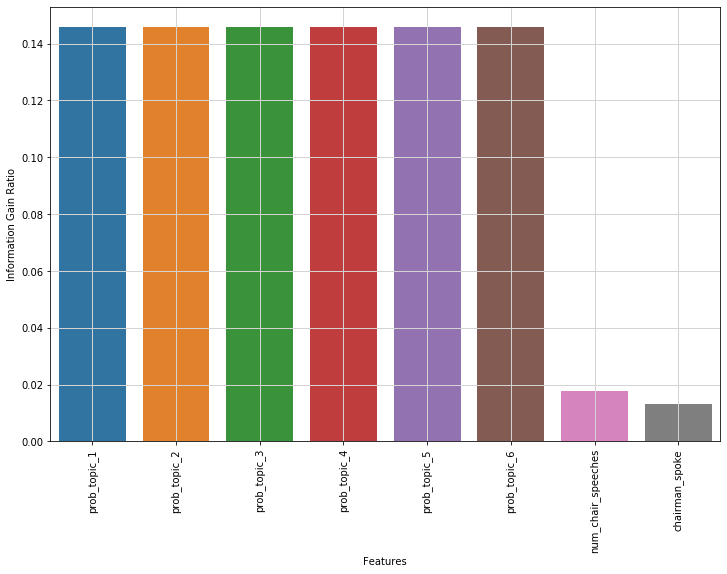

In [13]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Features", 
                 y="Information Gain Ratio", 
                 data=pd.DataFrame(igr_list, 
                                   columns=['Features', 
                                            'Information Gain Ratio']))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

### Hypothesis 2: “Movement of the Fed fund is dependent on the compound sentiment score of words used in the event rather than the nature of the event.”

#### Preparing Dataset

In [14]:
sentiments = pd.read_csv('../data/text_features/sentiments.csv')
sentiments

,sentiments
0,-0.1
1,0.0
2,0.0
3,0.0
4,0.6
...,...
176,0.1
177,0.1
178,0.1
179,0.3


In [15]:
hypo_2_df = pd.concat([lda, sentiments, target], axis=1)
hypo_2_df

,prob_topic_1,prob_topic_2,prob_topic_3,prob_topic_4,prob_topic_5,prob_topic_6,sentiments,target
0,2.532629e-07,0.442418,0.098614,0.148826,0.021148,2.889927e-01,-0.1,1
1,5.791823e-07,0.013136,0.000042,0.970716,0.002117,1.398868e-02,0.0,1
2,2.570856e-07,0.388304,0.011189,0.465910,0.011551,1.230458e-01,0.0,-1
3,2.403132e-07,0.492659,0.050694,0.115820,0.125781,2.150454e-01,0.0,1
4,1.027025e-06,0.005665,0.000001,0.992321,0.000148,1.864488e-03,0.6,0
...,...,...,...,...,...,...,...,...
176,8.155466e-07,0.001263,0.277596,0.718868,0.000778,1.493741e-03,0.1,0
177,7.587675e-07,0.001052,0.233172,0.763330,0.000944,1.501466e-03,0.1,0
178,8.281763e-07,0.000082,0.501833,0.497920,0.000163,8.281763e-07,0.1,0
179,1.981140e-06,0.000002,0.000002,0.999990,0.000002,1.981140e-06,0.3,-1


#### Information Gain Ratio to Determine Features Influencing Movement of Fed Rate

In [16]:
cols = hypo_2_df.iloc[:,:-1].columns
igr_list = []
print(cols)
for col in cols:
    key_value = []
    key_value.append(col)
    igr = info_gain.info_gain_ratio(
        hypo_2_df['target'].values.tolist(), 
        hypo_2_df[col].values.tolist())
    key_value.append(igr)
    igr_list.append(key_value)
igr_list = sorted(igr_list, key=lambda x: x[1], reverse=True)

Index(['prob_topic_1', 'prob_topic_2', 'prob_topic_3', 'prob_topic_4',
       'prob_topic_5', 'prob_topic_6', 'sentiments'],
      dtype='object')


In [17]:
igr_list

[['prob_topic_1', 0.14576104445178575],
 ['prob_topic_2', 0.14576104445178575],
 ['prob_topic_3', 0.14576104445178575],
 ['prob_topic_4', 0.14576104445178575],
 ['prob_topic_5', 0.14576104445178575],
 ['prob_topic_6', 0.14576104445178575],
 ['sentiments', 0.037195671118259055]]

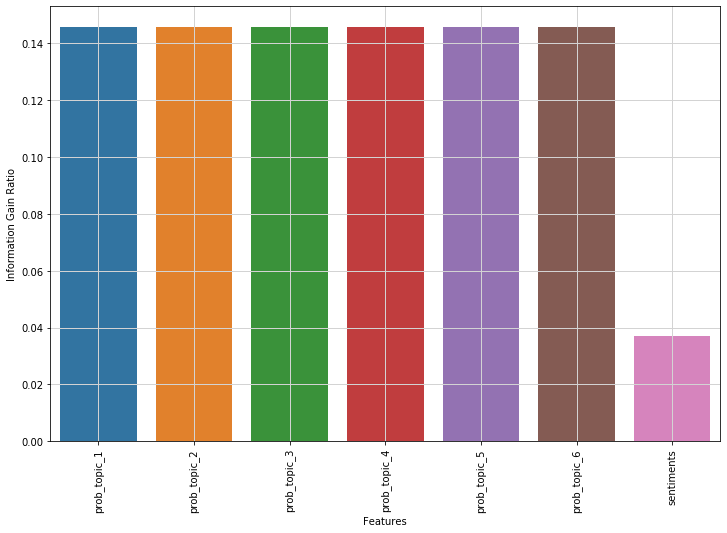

In [18]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Features", 
                 y="Information Gain Ratio", 
                 data=pd.DataFrame(igr_list, 
                                   columns=['Features', 
                                            'Information Gain Ratio']))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

### Hypothesis 3: “Macroeconomic data will have more predictive powers than Textual data in terms of predicting Fed Rate movement”

#### Preparing Dataset

In [19]:
hypo_3_df = pd.read_csv('../data/combined/combined.csv')
hypo_3_df

,GDPC1,CPIAUCSL,UNRATE,PAYEMS,RRSFS,GFDEBTN,VIXCLS,prob_topic_1,prob_topic_2,prob_topic_3,prob_topic_4,prob_topic_5,prob_topic_6,sentiments,target
0,15278.919000,199.400,4.8,135737.0,177887.0,8.387451e+06,12.34,2.532629e-07,0.442418,0.098614,0.148826,0.021148,2.889927e-01,-0.1,1
1,15290.812000,199.700,4.7,136047.0,178100.0,8.403747e+06,11.39,5.791823e-07,0.013136,0.000042,0.970716,0.002117,1.398868e-02,0.0,1
2,15302.705000,200.700,4.7,136205.0,178088.0,8.420042e+06,11.59,2.570856e-07,0.388304,0.011189,0.465910,0.011551,1.230458e-01,0.0,-1
3,15310.592667,201.300,4.6,136244.0,177200.0,8.449019e+06,16.44,2.403132e-07,0.492659,0.050694,0.115820,0.125781,2.150454e-01,0.0,1
4,15318.480333,201.800,4.6,136325.0,177343.0,8.477997e+06,13.08,1.027025e-06,0.005665,0.000001,0.992321,0.000148,1.864488e-03,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,18794.426000,260.462,6.9,142545.0,212005.0,2.774780e+07,38.02,8.155466e-07,0.001263,0.277596,0.718868,0.000778,1.493741e-03,0.1,0
177,18794.426000,260.927,6.7,142809.0,208966.0,2.774780e+07,20.57,7.587675e-07,0.001052,0.233172,0.763330,0.000944,1.501466e-03,0.1,0
178,18794.426000,261.560,6.7,142503.0,205818.0,2.774780e+07,22.75,8.281763e-07,0.000082,0.501833,0.497920,0.000163,8.281763e-07,0.1,0
179,18794.426000,262.231,6.3,142736.0,221008.0,2.774780e+07,33.09,1.981140e-06,0.000002,0.000002,0.999990,0.000002,1.981140e-06,0.3,-1


In [20]:
hypo_3_df_fe = pd.read_csv('../data/combined/final_combined.csv')
hypo_3_df_fe

,GDPC1,GDPC1_diff,GDPC1_sma_3,GDPC1_sma_5,GDPC1_ewm,CPIAUCSL,CPIAUCSL_diff,CPIAUCSL_sma_3,CPIAUCSL_sma_5,CPIAUCSL_ewm,...,VIXCLS_sma_5,VIXCLS_ewm,prob_topic_1,prob_topic_2,prob_topic_3,prob_topic_4,prob_topic_5,prob_topic_6,sentiments,target
0,15318.480333,0.051518,15310.592667,15300.301800,15283.867685,201.800,0.248385,201.266667,200.5800,199.675209,...,12.968,12.493353,1.027025e-06,0.005665,0.000001,9.923208e-01,0.000148,1.864488e-03,0.6,0
1,15326.368000,0.051491,15318.480333,15309.791600,15285.940871,202.900,0.545094,202.000000,201.2800,199.832516,...,13.490,12.613190,3.974326e-07,0.073057,0.349738,3.974326e-07,0.087838,4.893666e-01,0.0,1
2,15369.888000,0.283955,15338.245444,15325.606800,15290.035853,203.800,0.443568,202.833333,202.1000,200.026052,...,13.674,12.598400,3.292580e-07,0.602091,0.044666,4.766647e-02,0.049294,2.562828e-01,0.0,0
3,15413.408000,0.283151,15369.888000,15347.747400,15296.054006,202.800,-0.490677,203.166667,202.5200,200.161366,...,13.752,12.568234,2.579949e-07,0.076280,0.121305,1.086829e-02,0.048339,7.432073e-01,0.1,1
4,15456.928000,0.282352,15413.408000,15377.014467,15303.901518,201.900,-0.443787,202.833333,202.6400,200.246178,...,12.684,12.496613,1.209156e-06,0.057376,0.018356,8.510057e-01,0.011598,6.166330e-02,-0.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,18794.426000,0.352236,18728.457667,18589.415667,18506.105806,260.462,0.120316,260.040667,259.2016,253.480113,...,29.138,21.758281,8.155466e-07,0.001263,0.277596,7.188678e-01,0.000778,1.493741e-03,0.1,0
173,18794.426000,0.000000,18772.436556,18715.264000,18520.170206,260.927,0.178529,260.512667,259.9306,253.843375,...,27.166,21.700316,7.587675e-07,0.001052,0.233172,7.633303e-01,0.000944,1.501466e-03,0.1,0
174,18794.426000,0.000000,18794.426000,18754.845000,18533.548537,261.560,0.242597,260.983000,260.5218,254.219796,...,26.824,21.751520,8.281763e-07,0.000082,0.501833,4.979199e-01,0.000163,8.281763e-07,0.1,0
175,18794.426000,0.000000,18794.426000,18781.232333,18546.274267,262.231,0.256538,261.572667,261.0658,254.610587,...,28.160,22.304617,1.981140e-06,0.000002,0.000002,9.999901e-01,0.000002,1.981140e-06,0.3,-1


#### Information Gain Ratio to Determine Features Influencing Movement of Fed Rate (without Macro FE)

In [21]:
cols = hypo_3_df.iloc[:,:-1].columns
igr_list = []
print(cols)
for col in cols:
    key_value = []
    key_value.append(col)
    igr = info_gain.info_gain_ratio(
        hypo_3_df['target'].values.tolist(), 
        hypo_3_df[col].values.tolist())
    key_value.append(igr)
    igr_list.append(key_value)
igr_list = sorted(igr_list, key=lambda x: x[1], reverse=True)

Index(['GDPC1', 'CPIAUCSL', 'UNRATE', 'PAYEMS', 'RRSFS', 'GFDEBTN', 'VIXCLS',
       'prob_topic_1', 'prob_topic_2', 'prob_topic_3', 'prob_topic_4',
       'prob_topic_5', 'prob_topic_6', 'sentiments'],
      dtype='object')


In [22]:
igr_list

[['RRSFS', 0.14576104445178575],
 ['prob_topic_1', 0.14576104445178575],
 ['prob_topic_2', 0.14576104445178575],
 ['prob_topic_3', 0.14576104445178575],
 ['prob_topic_4', 0.14576104445178575],
 ['prob_topic_5', 0.14576104445178575],
 ['prob_topic_6', 0.14576104445178575],
 ['CPIAUCSL', 0.1453823994969227],
 ['GDPC1', 0.1451593642523349],
 ['GFDEBTN', 0.1451593642523349],
 ['PAYEMS', 0.14495337584117837],
 ['VIXCLS', 0.1445705786689036],
 ['UNRATE', 0.07548727288883196],
 ['sentiments', 0.037195671118259055]]

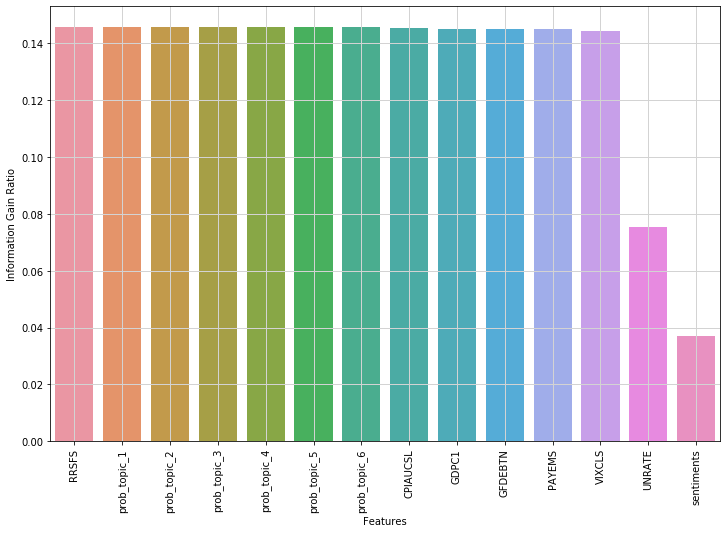

In [23]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Features", 
                 y="Information Gain Ratio", 
                 data=pd.DataFrame(igr_list, 
                                   columns=['Features', 
                                            'Information Gain Ratio']))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

#### Information Gain Ratio to Determine Features Influencing Movement of Fed Rate (with Macro FE)

In [24]:
cols = hypo_3_df_fe.iloc[:,:-1].columns
igr_list = []
print(cols)
for col in cols:
    key_value = []
    key_value.append(col)
    igr = info_gain.info_gain_ratio(
        hypo_3_df_fe['target'].values.tolist(), 
        hypo_3_df_fe[col].values.tolist())
    key_value.append(igr)
    igr_list.append(key_value)
igr_list = sorted(igr_list, key=lambda x: x[1], reverse=True)

Index(['GDPC1', 'GDPC1_diff', 'GDPC1_sma_3', 'GDPC1_sma_5', 'GDPC1_ewm',
       'CPIAUCSL', 'CPIAUCSL_diff', 'CPIAUCSL_sma_3', 'CPIAUCSL_sma_5',
       'CPIAUCSL_ewm', 'UNRATE', 'UNRATE_diff', 'UNRATE_sma_3', 'UNRATE_sma_5',
       'UNRATE_ewm', 'PAYEMS', 'PAYEMS_diff', 'PAYEMS_sma_3', 'PAYEMS_sma_5',
       'PAYEMS_ewm', 'RRSFS', 'RRSFS_diff', 'RRSFS_sma_3', 'RRSFS_sma_5',
       'RRSFS_ewm', 'GFDEBTN', 'GFDEBTN_diff', 'GFDEBTN_sma_3',
       'GFDEBTN_sma_5', 'GFDEBTN_ewm', 'VIXCLS', 'VIXCLS_diff', 'VIXCLS_sma_3',
       'VIXCLS_sma_5', 'VIXCLS_ewm', 'prob_topic_1', 'prob_topic_2',
       'prob_topic_3', 'prob_topic_4', 'prob_topic_5', 'prob_topic_6',
       'sentiments'],
      dtype='object')


In [25]:
igr_list

[['GDPC1_sma_5', 0.14660838568517373],
 ['GDPC1_ewm', 0.14660838568517373],
 ['CPIAUCSL_diff', 0.14660838568517373],
 ['CPIAUCSL_ewm', 0.14660838568517373],
 ['UNRATE_ewm', 0.14660838568517373],
 ['PAYEMS_diff', 0.14660838568517373],
 ['PAYEMS_sma_3', 0.14660838568517373],
 ['PAYEMS_ewm', 0.14660838568517373],
 ['RRSFS', 0.14660838568517373],
 ['RRSFS_diff', 0.14660838568517373],
 ['RRSFS_sma_3', 0.14660838568517373],
 ['RRSFS_sma_5', 0.14660838568517373],
 ['RRSFS_ewm', 0.14660838568517373],
 ['GFDEBTN_sma_5', 0.14660838568517373],
 ['GFDEBTN_ewm', 0.14660838568517373],
 ['VIXCLS_diff', 0.14660838568517373],
 ['VIXCLS_ewm', 0.14660838568517373],
 ['prob_topic_1', 0.14660838568517373],
 ['prob_topic_2', 0.14660838568517373],
 ['prob_topic_3', 0.14660838568517373],
 ['prob_topic_4', 0.14660838568517373],
 ['prob_topic_5', 0.14660838568517373],
 ['prob_topic_6', 0.14660838568517373],
 ['CPIAUCSL', 0.14622332939341046],
 ['VIXCLS_sma_3', 0.14622332939341046],
 ['GDPC1', 0.1459978163037512

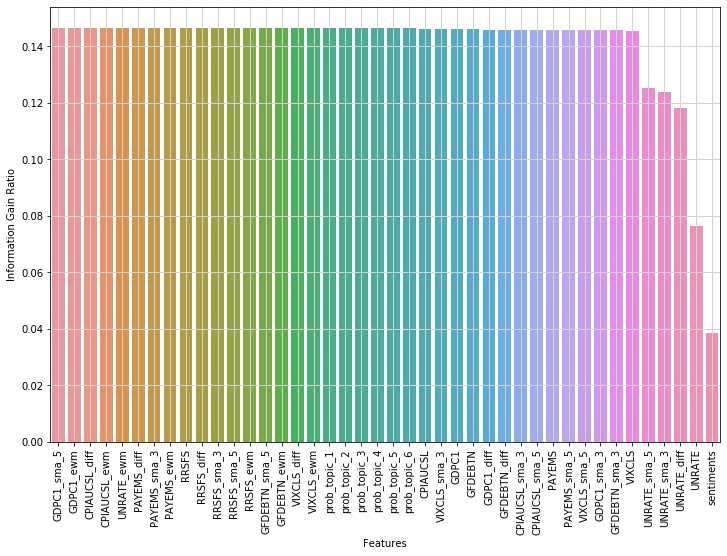

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Features", 
                 y="Information Gain Ratio", 
                 data=pd.DataFrame(igr_list, 
                                   columns=['Features', 
                                            'Information Gain Ratio']))
plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()